In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/Users/davidpeterson/Downloads/PIETHON/SAT.ACT/sat.act.csv')

In [3]:
df.head()

,Unnamed: 0,gender,education,age,ACT,SATV,SATQ
0,29442,2,3,19,24,500,500.0
1,29457,2,3,23,35,600,500.0
2,29498,2,3,20,21,480,470.0
3,29503,1,4,27,26,550,520.0
4,29504,1,2,33,31,600,550.0


In [4]:
df.shape

(700, 7)

In [5]:
df.isnull().sum()

Unnamed: 0     0
gender         0
education      0
age            0
ACT            0
SATV           0
SATQ          13
dtype: int64

In [15]:
df.describe()

,Unnamed: 0,gender,education,age,ACT,SATV,SATQ
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,687.000000
mean,34731.085714,1.647143,3.164286,25.594286,28.547143,612.234286,610.216885
std,3026.870021,0.478200,1.425351,9.498647,4.823560,112.902566,115.639297
min,29442.000000,1.000000,0.000000,13.000000,3.000000,200.000000,200.000000
25%,32116.750000,1.000000,3.000000,19.000000,25.000000,550.000000,530.000000
50%,34896.000000,2.000000,3.000000,22.000000,29.000000,620.000000,620.000000
75%,37250.500000,2.000000,4.000000,29.000000,32.000000,700.000000,700.000000
max,39985.000000,2.000000,5.000000,65.000000,36.000000,800.000000,800.000000


In [5]:
youngs = df[(df['age'] >=13) & (df['age'] <=17)] # (52,7)
adults = df[(df['age'] < 17) & (df['age'] <=30)] # (14,7)
older = df[(df['age'] >30) & (df['age'] <= 40)] # (92, 7) 
halfway_older = df[(df['age'] > 40) & (df['age'] <=50)] # (36, 7)
retired = df[df.age > 50] # (24, 7)

In [59]:
# Averages for YOUNGS 
print("ACT:", np.mean(youngs.ACT.values), 
      "\nSATV:", np.mean(youngs.SATV.values), 
      '\nSATQ:', np.mean(youngs.SATQ.values))

ACT: 28.134615384615383 
SATV: 629.0576923076923 
SATQ: 624.3846153846154


In [58]:
# Averages for ADULTS 
print("ACT:", np.mean(adults.ACT.values), 
      "\nSATV:", np.mean(adults.SATV.values), 
      '\nSATQ:', np.mean(adults.SATQ.values))

ACT: 28.214285714285715 
SATV: 670.7142857142857 
SATQ: 674.7142857142857


In [6]:
## Older 
print("ACT:", np.mean(older.ACT.values), 
      "\nSATV:", np.mean(older.SATV.values), 
      '\nSATQ:', np.mean(older.SATQ.values))

ACT: 29.17391304347826 
SATV: 596.2173913043479 
SATQ: 594.8369565217391


In [7]:
 ## Halfway Older 
print("ACT:", np.mean(halfway_older.ACT.values), 
      "\nSATV:", np.mean(halfway_older.SATV.values), 
      '\nSATQ:', np.mean(halfway_older.SATQ.values))

ACT: 30.25 
SATV: 618.6111111111111 
SATQ: 609.8611111111111


In [8]:
# retired 
print("ACT:", np.mean(retired.ACT.values), 
      "\nSATV:", np.mean(retired.SATV.values), 
      '\nSATQ:', np.mean(retired.SATQ.values))

ACT: 29.541666666666668 
SATV: 606.2916666666666 
SATQ: nan


In [43]:
retired.set_index('Unnamed: 0')
retired.reset_index(drop=True)
retired = retired.drop(retired.index[13]).reset_index(drop=True)

In [42]:
# retired 
print("ACT:", np.mean(retired.ACT.values), 
      "\nSATV:", np.mean(retired.SATV.values), 
      '\nSATQ:', np.mean(retired.SATQ.values))

ACT: 29.52173913043478 
SATV: 606.5652173913044 
SATQ: 621.4782608695652


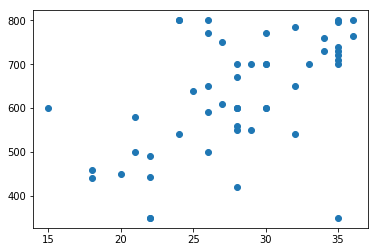

In [58]:
x = youngs.ACT
y = youngs.SATV
plt.scatter(x,y)

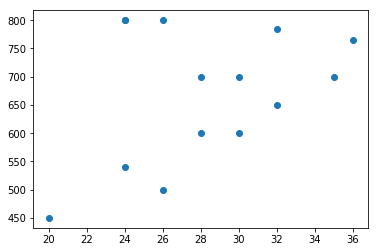

In [59]:
x = adults.ACT
y = adults.SATV
plt.scatter(x,y)

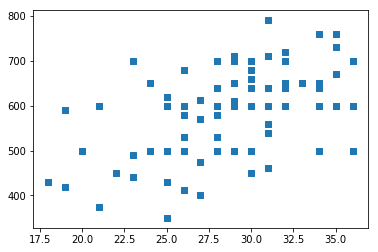

In [104]:
x = older.ACT.values
y = older.SATV.values
plt.scatter(x,y,marker='s')

In [120]:

x = x.reshape(-1,1)
reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.2524145209258327